In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [31]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS=10

In [15]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "POTATO",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
    


Found 7128 files belonging to 3 classes.


In [16]:
class_names = dataset.class_names
class_names

['Test', 'Train', 'Val']

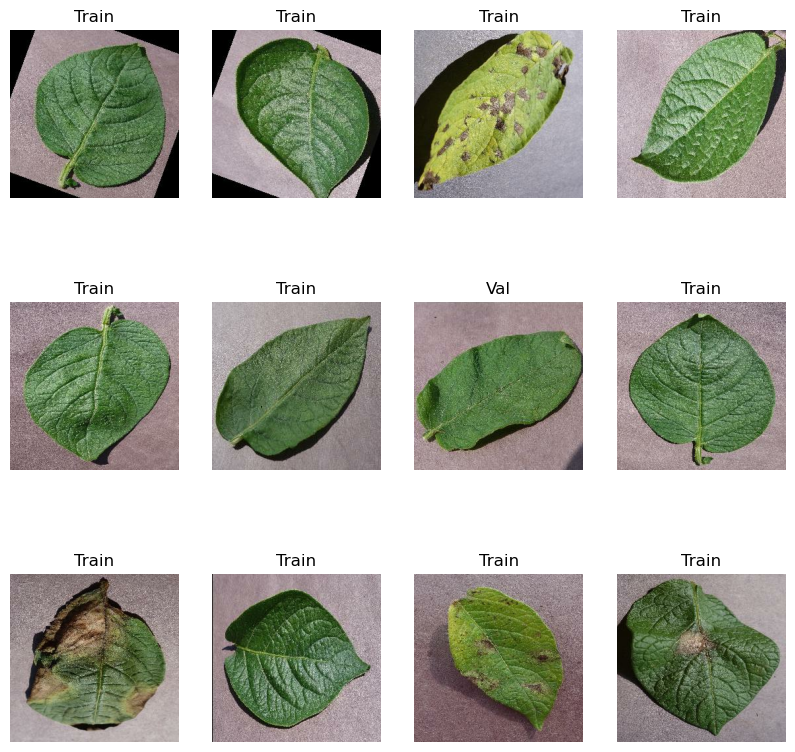

In [19]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [25]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Train",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
    


Found 5702 files belonging to 3 classes.


In [26]:
class_names = train_ds.class_names
class_names

['Early Blight', 'Healthy', 'Late Blight']

In [22]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Test",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 144 files belonging to 3 classes.


In [23]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Val",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1282 files belonging to 3 classes.


In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds =val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [29]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [28]:
data_augumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [34]:
input_shape=(BATCH_SIZE,IMAGE_SIZE , IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augumentation,
    layers.Conv2D(32, (3,3) , activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])

model.build(input_shape=input_shape)

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                 

In [37]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [39]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)

Epoch 1/10
179/179 [==============================] - 206s 1s/step - loss: 0.6971 - accuracy: 0.6592 - val_loss: 0.3193 - val_accuracy: 0.8580
Epoch 2/10
179/179 [==============================] - 178s 991ms/step - loss: 0.2264 - accuracy: 0.9144 - val_loss: 0.1166 - val_accuracy: 0.9626
Epoch 3/10
179/179 [==============================] - 175s 976ms/step - loss: 0.1018 - accuracy: 0.9628 - val_loss: 0.1487 - val_accuracy: 0.9438
Epoch 4/10
179/179 [==============================] - 180s 1s/step - loss: 0.0982 - accuracy: 0.9653 - val_loss: 0.1383 - val_accuracy: 0.9509
Epoch 5/10
179/179 [==============================] - 179s 999ms/step - loss: 0.0578 - accuracy: 0.9804 - val_loss: 0.0430 - val_accuracy: 0.9852
Epoch 6/10
179/179 [==============================] - 184s 1s/step - loss: 0.0660 - accuracy: 0.9774 - val_loss: 0.2101 - val_accuracy: 0.9189
Epoch 7/10
179/179 [==============================] - 171s 954ms/step - loss: 0.0481 - accuracy: 0.9842 - val_loss: 0.0557 - val_accu

In [40]:
scores=model.evaluate(test_ds)

5/5 [==============================] - 1s 158ms/step - loss: 0.0756 - accuracy: 0.9792


In [41]:
history

In [42]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 179}

In [43]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

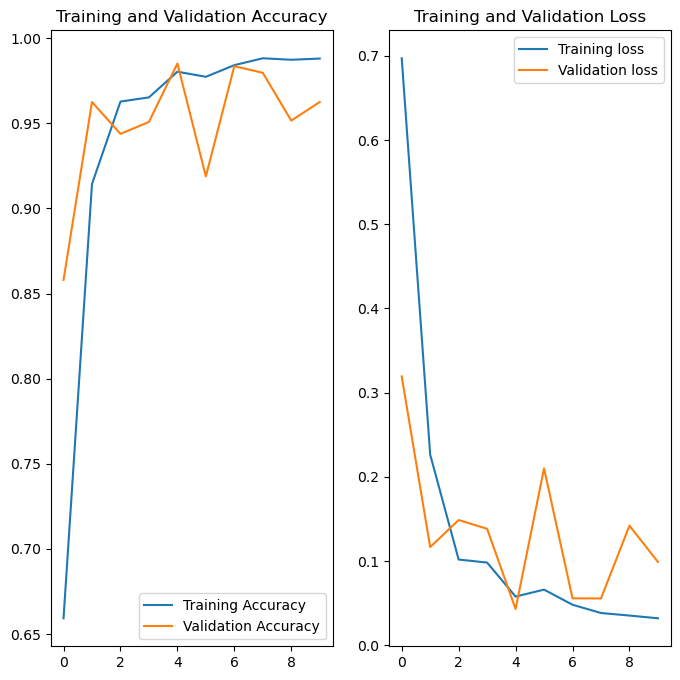

In [45]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training loss')
plt.plot(range(EPOCHS), val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
first image's actual label :  Early Blight
1/1 [==============================] - 0s 327ms/step
Predicted Label:  Early Blight


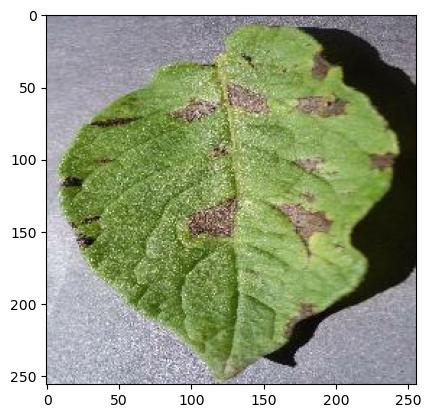

In [46]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label : ",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted Label: " ,class_names[np.argmax(batch_prediction[0])])

In [54]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 52ms/step


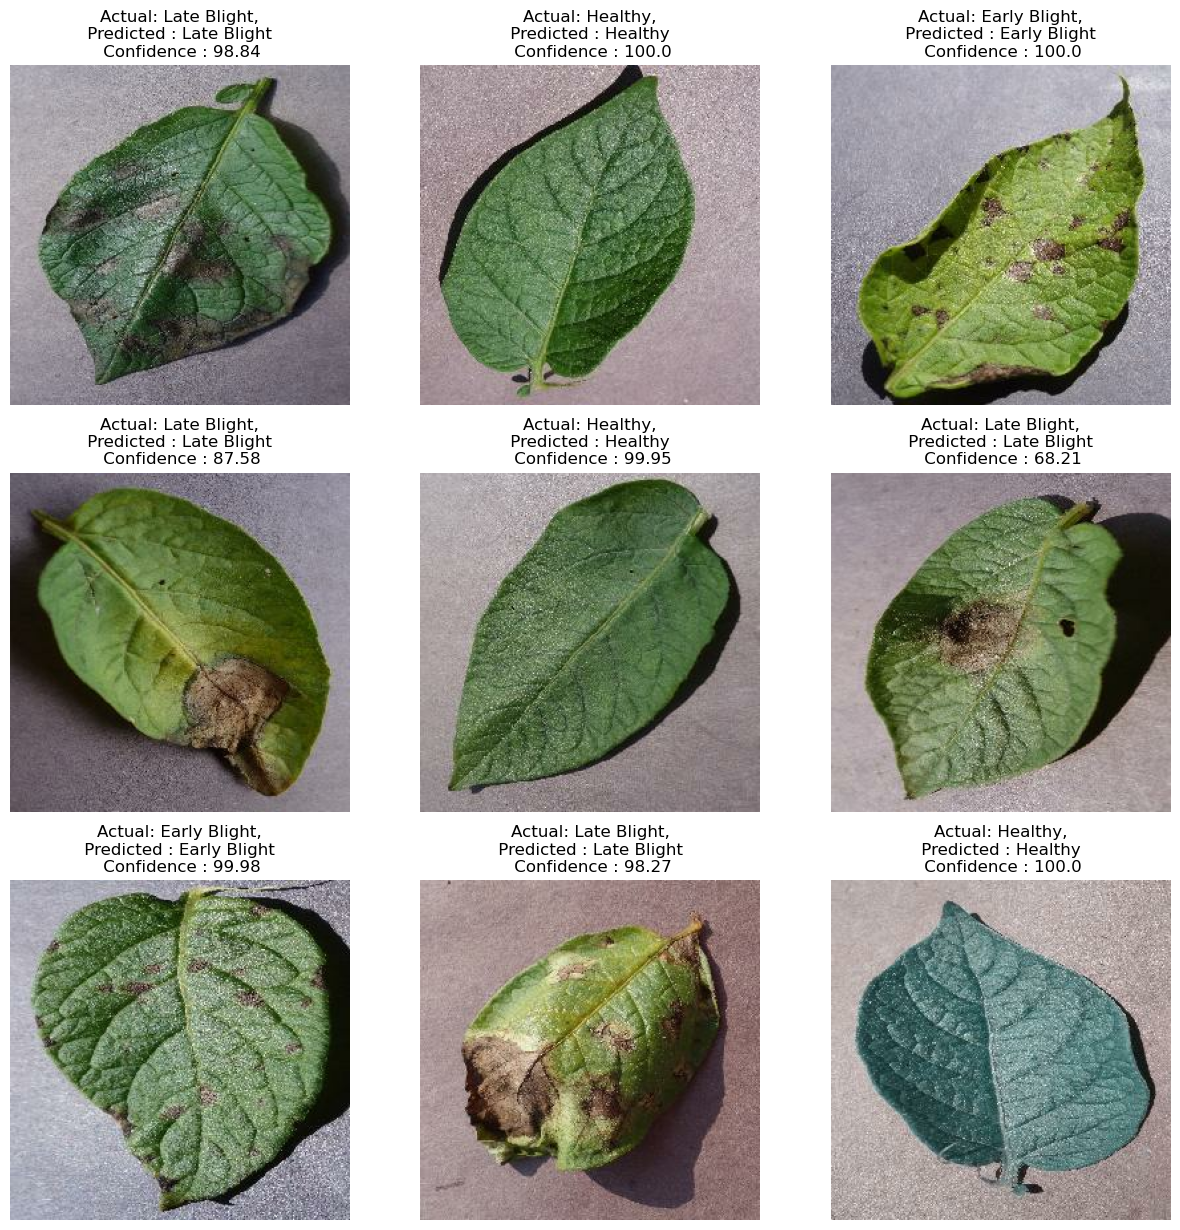

In [69]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted : {predicted_class} \n Confidence : {confidence}")
        plt.axis("off")

In [62]:
model_version=1
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/1\assets


INFO:tensorflow:Assets written to: ./models/1\assets


In [ ]:
import os
model_version=max([int(i) for i in os.listdir("./models")+[0]])+1
model.save(f"./models/{model_version}")